In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraudd/fraud_dataset.csv
/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [3]:
data1=pd.read_csv("/kaggle/input/fraud-detection/fraudTest.csv")
data2=pd.read_csv("/kaggle/input/fraud-detection/fraudTrain.csv")

In [4]:
data = pd.read_csv("/kaggle/input/fraudd/fraud_dataset.csv")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1000000 non-null  int64  
 1   trans_date_trans_time  1000000 non-null  object 
 2   cc_num                 1000000 non-null  int64  
 3   merchant               1000000 non-null  object 
 4   category               1000000 non-null  object 
 5   amt                    1000000 non-null  float64
 6   first                  1000000 non-null  object 
 7   last                   1000000 non-null  object 
 8   gender                 1000000 non-null  object 
 9   street                 1000000 non-null  object 
 10  city                   1000000 non-null  object 
 11  state                  1000000 non-null  object 
 12  zip                    1000000 non-null  int64  
 13  lat                    1000000 non-null  float64
 14  long               

In [8]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-05-03 17:22:38,3551217896304745,fraud_Kassulke PLC,shopping_net,37.89,Sara,Harris,F,597 Jenny Ford Apt. 543,...,44.2320,-74.4905,6120,Chartered loss adjuster,1976-10-09,25c3b04d23630af07f552885b4c9d59d,1336065758,43.731657,-73.759974,0
1,1,2019-01-19 07:57:51,567868110212,fraud_Schmeler Inc,misc_pos,29.44,Dawn,Tucker,F,789 Herring Manors,...,29.7736,-95.4034,2906700,"Copywriter, advertising",1984-12-16,3507d587d0fff40e0023876635a5f430,1326959871,30.534987,-95.981341,0
2,2,2020-05-29 11:53:50,213174467670432,fraud_Kuhn LLC,misc_net,30.40,James,Bishop,M,7055 Fernandez Estates Apt. 676,...,39.4015,-75.8654,663,Podiatrist,1969-01-14,ba4409f074ebe0b0f3c82b5b9629d0b5,1369828430,39.717951,-75.664617,0
3,3,2019-07-07 14:55:37,639023984367,"fraud_Feil, Hilpert and Koss",food_dining,191.13,Destiny,Lowe,F,79472 Stevens Trace Apt. 120,...,44.6087,-74.9732,69,Chief Executive Officer,1991-06-05,752d1e18ecc78b929e82d4fb82eedc1a,1341672937,45.006149,-74.163955,0
4,4,2019-03-21 02:35:12,2720894374956739,fraud_Schamberger-O'Keefe,grocery_pos,323.61,Audrey,Hickman,F,3325 Gregory Square,...,42.5978,-82.8823,16305,"Psychologist, sport and exercise",1927-05-25,40f04a78f9517597b80eeb6ed43bda09,1332297312,42.589436,-82.680995,1


In [9]:
# extracting features that we work in fraud analysis
fraud_features = ['trans_date_trans_time','category','amt','state','city_pop', 'job', 'dob','is_fraud']
 
df = data[fraud_features] 
df.head()

,trans_date_trans_time,category,amt,state,city_pop,job,dob,is_fraud
0,2019-05-03 17:22:38,shopping_net,37.89,NY,6120,Chartered loss adjuster,1976-10-09,0
1,2019-01-19 07:57:51,misc_pos,29.44,TX,2906700,"Copywriter, advertising",1984-12-16,0
2,2020-05-29 11:53:50,misc_net,30.40,MD,663,Podiatrist,1969-01-14,0
3,2019-07-07 14:55:37,food_dining,191.13,NY,69,Chief Executive Officer,1991-06-05,0
4,2019-03-21 02:35:12,grocery_pos,323.61,MI,16305,"Psychologist, sport and exercise",1927-05-25,1


In [10]:
len(df[df["is_fraud"]==1])

5781

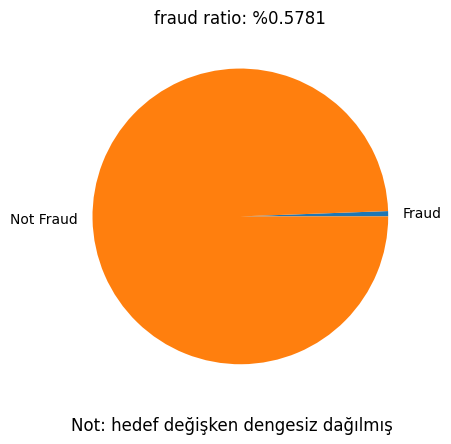

In [11]:
"""dengesiz veriseti"""
plt.pie([len(df[df["is_fraud"]==1]), len(df)], labels=["Fraud", "Not Fraud"])
ratio = len(df[df["is_fraud"]==1]) / len(df)
plt.title(f"fraud ratio: %{ratio*100}")
plt.figtext(0.5, 0.05, 'Not: hedef değişken dengesiz dağılmış', ha='center', fontsize=12)
plt.show()

In [12]:
df.nunique()

trans_date_trans_time    986994
category                     14
amt                       47686
state                        51
city_pop                    879
job                         494
dob                         968
is_fraud                      2
dtype: int64

In [13]:
df.describe()

,amt,city_pop,is_fraud
count,1000000.000000,1.000000e+06,1000000.000000
mean,70.325743,8.899886e+04,0.005781
std,156.322963,3.020252e+05,0.075813
min,1.000000,2.300000e+01,0.000000
25%,9.650000,7.430000e+02,0.000000
50%,47.550000,2.456000e+03,0.000000
75%,83.190000,2.032800e+04,0.000000
max,27390.120000,2.906700e+06,1.000000


In [14]:
df = df[df["amt"]<15000]


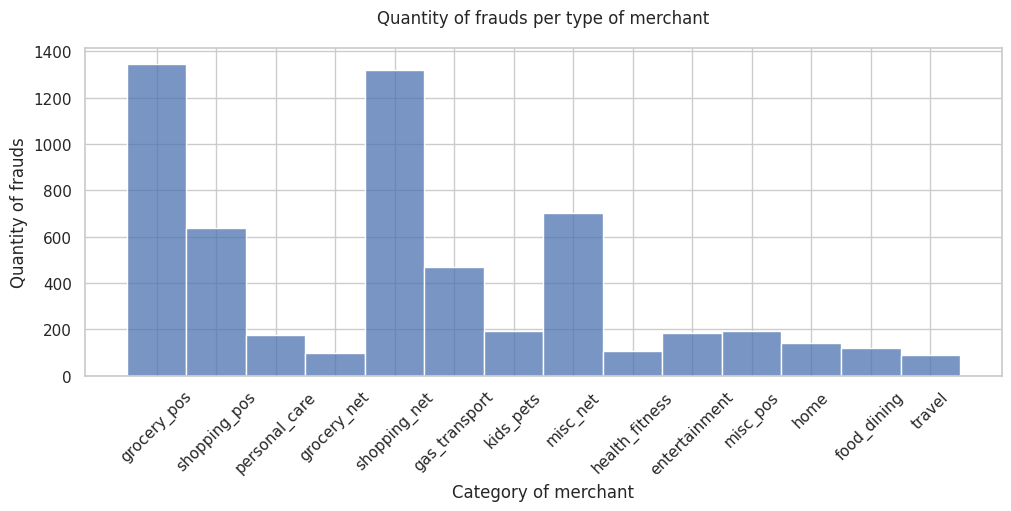

In [15]:

purchase = df[['category', 'amt', 'is_fraud']]

sns.set_theme(style='whitegrid')

fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)

sns.histplot(ax=ax, x='category', data=purchase[purchase['is_fraud'] == 1])

ax.tick_params(axis='x', labelrotation=45)
ax.set_ylabel('Quantity of frauds')
ax.set_xlabel('Category of merchant')
ax.set_title('Quantity of frauds per type of merchant', y=1.05)

plt.show()


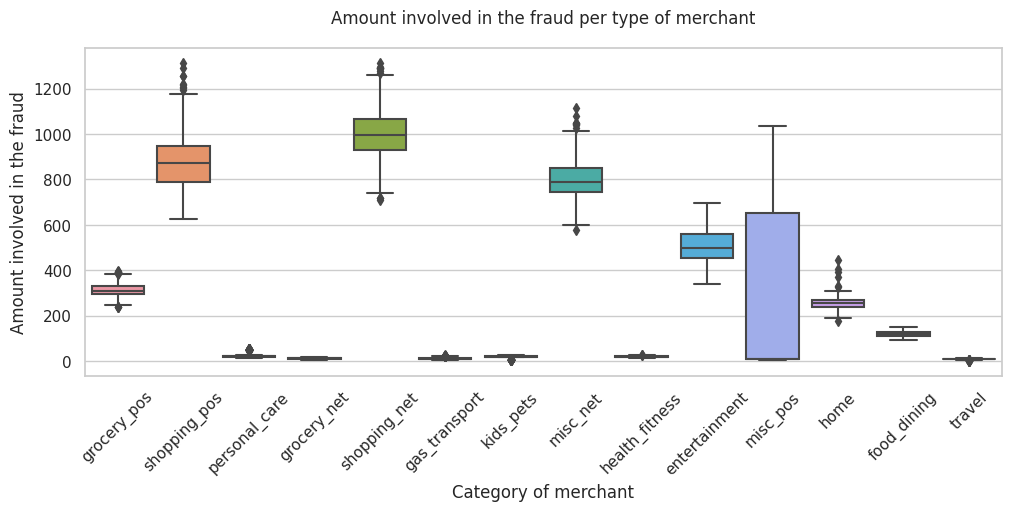

In [16]:
purchase = df[['category', 'amt', 'is_fraud']]

sns.set_theme(style='whitegrid')

plt.figure(figsize=(10, 5), constrained_layout=True)
sns.boxplot(x='category', y='amt', data=purchase[purchase['is_fraud'] == 1])
plt.xticks(rotation=45)
plt.ylabel('Amount involved in the fraud')
plt.xlabel('Category of merchant')
plt.title('Amount involved in the fraud per type of merchant', y=1.05)
plt.show()


In [17]:
#set the dataframe to analyze the relation between older people and the quantity of frauds
old = df.copy()
old['dob'] = pd.to_datetime(old['dob']).dt.year
old['dob'] = 2024 - old['dob']
old.sort_values('dob').head()

,trans_date_trans_time,category,amt,state,city_pop,job,dob,is_fraud
33458,2020-05-04 21:21:55,kids_pets,55.84,OH,267,Facilities manager,19,0
310538,2019-04-13 12:52:23,food_dining,168.73,OH,267,Facilities manager,19,0
379366,2020-03-20 17:09:20,food_dining,6.14,OH,267,Facilities manager,19,0
433715,2019-12-21 13:29:52,health_fitness,2.44,OH,267,Facilities manager,19,0
937702,2020-05-18 21:59:53,food_dining,6.53,OH,267,Facilities manager,19,0


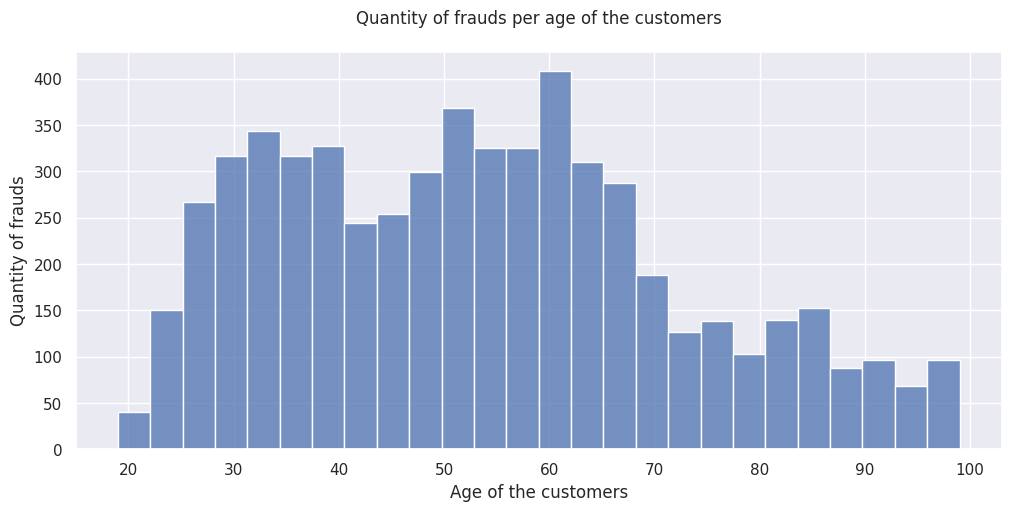

In [18]:

sns.set()

fig, ax = plt.subplots(1, 1, figsize=(10, 5), constrained_layout=True)

sns.histplot(ax=ax, x='dob', data=old[old['is_fraud'] == 1])
ax.set_title('Quantity of frauds per age of the customers', y=1.05)
ax.set_xlabel('Age of the customers')
ax.set_ylabel('Quantity of frauds')

plt.show()

In [19]:
fraud = df.copy()
fraud.head()

,trans_date_trans_time,category,amt,state,city_pop,job,dob,is_fraud
0,2019-05-03 17:22:38,shopping_net,37.89,NY,6120,Chartered loss adjuster,1976-10-09,0
1,2019-01-19 07:57:51,misc_pos,29.44,TX,2906700,"Copywriter, advertising",1984-12-16,0
2,2020-05-29 11:53:50,misc_net,30.40,MD,663,Podiatrist,1969-01-14,0
3,2019-07-07 14:55:37,food_dining,191.13,NY,69,Chief Executive Officer,1991-06-05,0
4,2019-03-21 02:35:12,grocery_pos,323.61,MI,16305,"Psychologist, sport and exercise",1927-05-25,1


In [20]:
#Convert the time columns from object type to int type.
fraud['trans_hour'] = pd.to_datetime(fraud['trans_date_trans_time']).dt.hour
fraud['birth_year'] = pd.to_datetime(fraud['dob']).dt.year

fraud.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)


fraud.describe()

,amt,city_pop,is_fraud,trans_hour,birth_year
count,999995.000000,9.999950e+05,999995.000000,999995.000000,999995.000000
mean,70.223922,8.899905e+04,0.005781,12.802309,1973.263509
std,149.049973,3.020259e+05,0.075813,6.820101,17.377700
min,1.000000,2.300000e+01,0.000000,0.000000,1924.000000
25%,9.650000,7.430000e+02,0.000000,7.000000,1962.000000
50%,47.550000,2.456000e+03,0.000000,14.000000,1975.000000
75%,83.180000,2.032800e+04,0.000000,19.000000,1987.000000
max,14467.640000,2.906700e+06,1.000000,23.000000,2005.000000


In [21]:
fraud.head()

,category,amt,state,city_pop,job,is_fraud,trans_hour,birth_year
0,shopping_net,37.89,NY,6120,Chartered loss adjuster,0,17,1976
1,misc_pos,29.44,TX,2906700,"Copywriter, advertising",0,7,1984
2,misc_net,30.40,MD,663,Podiatrist,0,11,1969
3,food_dining,191.13,NY,69,Chief Executive Officer,0,14,1991
4,grocery_pos,323.61,MI,16305,"Psychologist, sport and exercise",1,2,1927


In [22]:
 
fraud_features = ['trans_hour','category','amt','state','city_pop','birth_year', 'job']
 
X = fraud[fraud_features] 
y = fraud['is_fraud']

In [23]:
fraud.head()

,category,amt,state,city_pop,job,is_fraud,trans_hour,birth_year
0,shopping_net,37.89,NY,6120,Chartered loss adjuster,0,17,1976
1,misc_pos,29.44,TX,2906700,"Copywriter, advertising",0,7,1984
2,misc_net,30.40,MD,663,Podiatrist,0,11,1969
3,food_dining,191.13,NY,69,Chief Executive Officer,0,14,1991
4,grocery_pos,323.61,MI,16305,"Psychologist, sport and exercise",1,2,1927


In [24]:
s = (X.dtypes == 'object')
object_cols = list(s[s].index)


label_encoder = LabelEncoder()

for col in object_cols:
    X[col] = label_encoder.fit_transform(X[col])

X.head()

,trans_hour,category,amt,state,city_pop,birth_year,job
0,17,11,37.89,34,6120,1976,70
1,7,9,29.44,43,2906700,1984,110
2,11,8,30.40,20,663,1969,344
3,14,1,191.13,34,69,1991,74
4,2,4,323.61,22,16305,1927,372


In [25]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max ölçekleyici oluşturma
scaler = MinMaxScaler()

# X veri setine ölçeklendirme uygulama
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled)

X_scaled.rename(columns={ 0: 'trans_hour', 1: 'category', 2: 'amt', 3: 'state', 4: 'city_pop', 5: 'birth_year', 6: 'job' }, inplace=True)

X_scaled.head

<bound method NDFrame.head of         trans_hour  category       amt  state  city_pop  birth_year       job
0         0.739130  0.846154  0.002550   0.68  0.002098    0.641975  0.141988
1         0.304348  0.692308  0.001966   0.86  1.000000    0.740741  0.223124
2         0.478261  0.615385  0.002032   0.40  0.000220    0.555556  0.697769
3         0.608696  0.076923  0.013143   0.68  0.000016    0.827160  0.150101
4         0.086957  0.307692  0.022300   0.44  0.005602    0.037037  0.754564
...            ...       ...       ...    ...       ...         ...       ...
999990    0.086957  0.153846  0.004934   0.96  0.000501    0.506173  0.628803
999991    0.260870  0.692308  0.000092   0.12  0.001863    0.493827  0.547667
999992    0.913043  0.461538  0.008106   0.64  0.000099    0.666667  0.890467
999993    0.391304  0.923077  0.000318   0.46  0.000040    0.222222  0.302231
999994    0.782609  0.769231  0.009659   0.80  0.000174    0.802469  0.052738

[999995 rows x 7 columns]>

In [26]:
X=X_scaled

<Axes: >

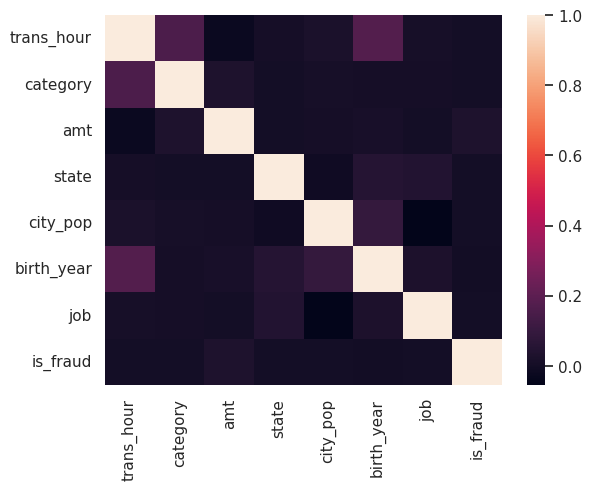

In [27]:
sns.heatmap(pd.concat([X,y], axis=1).corr())

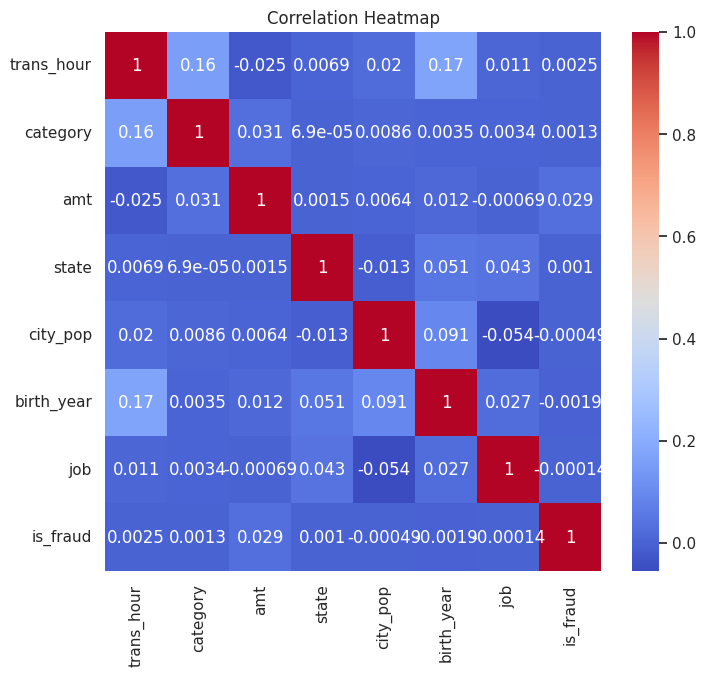

In [28]:
corr_matrix = pd.concat([X, y], axis=1).corr()

# Isı haritası çizimi
plt.figure(figsize=(8, 7))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
a

NameError: name 'a' is not defined

In [ ]:
#try the first model with default parameter.
clf = LinearSVC(class_weight='balanced')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
crsvc = cr(y_test, y_pred)
print("Logistic Regression Sonuçları:")
print(crsvc+"\n")



#Try the second model with the default parameter.
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
crknn = cr(y_test,y_pred)
print("KNN Sonuçları:")
print(crknn+"\n")



#Try the third model with default parameters
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
crrfc = cr(y_test,y_pred)
print("Random Forest Sonuçları:")
print(crrfc+"\n")


xgb = XGBClassifier(class_weight='balanced')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
f1_xgb = f1_score(y_pred, y_test)
print("XGBoost Sonuçları:")
crxgb = cr(y_test, y_pred)
print(crxgb+"\n")



import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")
crysa = cr(y_test, y_pred_nn)
print('Yapay Sinir Ağı Sonuçları:')
print(crysa+"\n")


In [ ]:
import matplotlib.pyplot as plt

# Modeller ve F1 skorları
models = ["Logistic Regression", "KNN", "Random Forest", "XGBoost", "YSA"]
f1_scores = [0.22, 0.33, 0.85, 0.86, 0.78]

# Bar plot oluşturma
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color='skyblue')
plt.xlabel('Modeller')
plt.ylabel('F1 Skoru')
plt.title('Modellerin F1 Skoru Karşılaştırması')
plt.ylim(0, 1)
plt.show()


In [31]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import f1_score, classification_report as cr

# XGBoost modeli oluşturma
xgb_model = xgb.XGBClassifier(class_weight='balanced')

# Hiperparametrelerin belirlenmesi
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}

# GridSearchCV kullanarak çapraz doğrulama ve hiperparametre optimizasyonu
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# En iyi hiperparametreler ile model
best_xgb_model = grid_search.best_estimator_

# Test seti üzerinde tahmin yapma
y_pred = best_xgb_model.predict(X_test)

# F1 skorunu hesaplama
f1_xgb = f1_score(y_test, y_pred)
print(f'En iyi F1 Skoru: {f1_xgb}')

# Sınıflandırma raporu ve karışıklık matrisi
crxgb = cr(y_test, y_pred)
print("XGBoost Sonuçları:")
print(crxgb)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
En iyi F1 Skoru: 0.8582302568981921
XGBoost Sonuçları:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198865
           1       0.93      0.80      0.86      1134

    accuracy                           1.00    199999
   macro avg       0.97      0.90      0.93    199999
weighted avg       1.00      1.00      1.00    199999



In [32]:
from sklearn.model_selection import GridSearchCV, KFold
import xgboost as xgb
from sklearn.metrics import f1_score, classification_report as cr

# XGBoost modeli oluşturma
xgb_model = xgb.XGBClassifier()

# Hiperparametrelerin belirlenmesi
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}

# K-fold çapraz doğrulama ayarı (5 kat)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV kullanarak çapraz doğrulama ve hiperparametre optimizasyonu
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=kf, verbose=1)
grid_search.fit(X_train, y_train)

# En iyi hiperparametreler ile model
best_xgb_model = grid_search.best_estimator_

# Test seti üzerinde tahmin yapma
y_pred = best_xgb_model.predict(X_test)

# F1 skorunu hesaplama
f1_xgb = f1_score(y_test, y_pred)
print(f'En iyi F1 Skoru: {f1_xgb}')

# Sınıflandırma raporu ve karışıklık matrisi
crxgb = cr(y_test, y_pred)
print("XGBoost Sonuçları:")
print(crxgb)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
En iyi F1 Skoru: 0.8651738923296808
XGBoost Sonuçları:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198865
           1       0.94      0.80      0.87      1134

    accuracy                           1.00    199999
   macro avg       0.97      0.90      0.93    199999
weighted avg       1.00      1.00      1.00    199999



In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")
crysa = cr(y_test, y_pred_nn)
print('Yapay Sinir Ağı Sonuçları:')
print(crysa+"\n")


In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight
from tensorflow import keras
from tensorflow.keras import layers

# Hedef değişkenini kontrol etme ve tipini ayarlama
y_train = y_train.astype(int)
print(np.unique(y_train))

# SMOTE kullanarak veri dengesini sağlama
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Sınıf ağırlıklarını hesaplama
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_smote), y=y_train_smote)
class_weights_dict = {int(label): weight for label, weight in zip(np.unique(y_train_smote), class_weights)}

print(class_weights_dict)

# Modeli yeniden oluşturma ve derleme
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_smote.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli sınıf ağırlıkları ile eğitme
model.fit(X_train_smote, y_train_smote, epochs=20, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weights_dict)

# Modelin performansını değerlendirme
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")
crysa = cr(y_test, y_pred_nn)
print('Yapay Sinir Ağı Sonuçları:')
print(crysa)



In [ ]:
y_train.unique()

In [ ]:
#Try the third model with default parameters
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
cmrfc = confusion_matrix(y_test, y_pred).T
crrfc = cr(y_test,y_pred)
print(crrfc)
print(cmrfc)


In [ ]:
from sklearn.model_selection import KFold
k = 5 
kf = KFold(n_splits=k, shuffle=True, random_state=42)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

from sklearn.model_selection import cross_val_score 
scores = cross_val_score(model, X, y, cv=kf, scoring='f1')

import numpy as np  

average_r2 = np.mean(scores) 

print(f"F1 Score for each fold: {[round(score, 4) for score in scores]}")
print(f"Average F1 across {k} folds: {average_r2:.2f}")

In [ ]:
a

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import f1_score, make_scorer

# Veriyi böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# F1 score'u kullanmak için scorer
f1_scorer = make_scorer(f1_score, average='weighted')


In [ ]:
knn = KNeighborsClassifier()

# Hiperparametreler
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Grid Search
knn_grid = GridSearchCV(knn, knn_params, scoring=f1_scorer, cv=skf)
knn_grid.fit(X_train, y_train)

# En iyi model
best_knn = knn_grid.best_estimator_
print(f"Best KNN Model: {best_knn}")
print(f"KNN Best F1 Score: {knn_grid.best_score_}")


In [ ]:
logreg = LogisticRegression(solver='liblinear')

# Hiperparametreler
logreg_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Grid Search
logreg_grid = GridSearchCV(logreg, logreg_params, scoring=f1_scorer, cv=skf)
logreg_grid.fit(X_train, y_train)

# En iyi model
best_logreg = logreg_grid.best_estimator_
print(f"Best Logistic Regression Model: {best_logreg}")
print(f"Logistic Regression Best F1 Score: {logreg_grid.best_score_}")


In [ ]:
rf = RandomForestClassifier(random_state=42)

# Hiperparametreler
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Grid Search
rf_grid = GridSearchCV(rf, rf_params, scoring=f1_scorer, cv=skf)
rf_grid.fit(X_train, y_train)

# En iyi model
best_rf = rf_grid.best_estimator_
print(f"Best Random Forest Model: {best_rf}")
print(f"Random Forest Best F1 Score: {rf_grid.best_score_}")


In [ ]:
xgboost = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)

# Hiperparametreler
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid Search
xgb_grid = GridSearchCV(xgboost, xgb_params, scoring=f1_scorer, cv=skf)
xgb_grid.fit(X_train, y_train)

# En iyi model
best_xgb = xgb_grid.best_estimator_
print(f"Best XGBoost Model: {best_xgb}")
print(f"XGBoost Best F1 Score: {xgb_grid.best_score_}")


In [ ]:
%pip install tensorflow scikit-learn


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Veriyi böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# F1 score'u kullanmak için scorer
f1_scorer = make_scorer(f1_score, average='weighted')


In [ ]:
def create_model(learning_rate=0.01):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# KerasClassifier ile modeli paketleyelim
model = KerasClassifier(build_fn=create_model, verbose=0)

# Hiperparametreler
param_grid = {
    'epochs': [50, 100],
    'batch_size': [10, 20],
    'learning_rate': [0.01, 0.001]
}

# Grid Search
nn_grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=f1_scorer, cv=skf)
nn_grid.fit(X_train, y_train)

# En iyi model
best_nn = nn_grid.best_estimator_
print(f"Best Neural Network Model: {best_nn}")
print(f"Neural Network Best F1 Score: {nn_grid.best_score_}")


In [ ]:
# Modellerin En İyi F1 Skorları
results = {
    'Model': ['KNN', 'Logistic Regression', 'Random Forest', 'XGBoost', 'Neural Network'],
    'Best F1 Score': [knn_grid.best_score_, logreg_grid.best_score_, rf_grid.best_score_, xgb_grid.best_score_, nn_grid.best_score_]
}

# Tabloda Gösterme
results_df = pd.DataFrame(results)
print(results_df)


In [ ]:
a

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score, make_scorer, classification_report
from sklearn.utils.class_weight import compute_class_weight

# Veriyi böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# F1 score'u kullanmak için scorer
f1_scorer = make_scorer(f1_score, average='weighted')

# KNN
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_grid = GridSearchCV(knn, knn_params, scoring=f1_scorer, cv=skf)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_

# Logistic Regression
logreg = LogisticRegression(solver='liblinear')
logreg_params = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
logreg_grid = GridSearchCV(logreg, logreg_params, scoring=f1_scorer, cv=skf)
logreg_grid.fit(X_train, y_train)
best_logreg = logreg_grid.best_estimator_

# Random Forest
rf = RandomForestClassifier(random_state=42)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
rf_grid = GridSearchCV(rf, rf_params, scoring=f1_scorer, cv=skf)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# XGBoost
xgboost = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)
xgb_params = {'n_estimators': [100, 200, 300], 'max_depth': [3, 6, 9], 'learning_rate': [0.01, 0.1, 0.2], 'subsample': [0.8, 1.0], 'colsample_bytree': [0.8, 1.0]}
xgb_grid = GridSearchCV(xgboost, xgb_params, scoring=f1_scorer, cv=skf)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

# Neural Network
def create_model(learning_rate=0.01):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = KerasClassifier(build_fn=create_model, verbose=0)
nn_params = {'epochs': [50, 100], 'batch_size': [10, 20], 'learning_rate': [0.01, 0.001]}
nn_grid = GridSearchCV(estimator=nn_model, param_grid=nn_params, scoring=f1_scorer, cv=skf)
nn_grid.fit(X_train, y_train)
best_nn = nn_grid.best_estimator_

# Tüm modellerin en iyi F1 skorları
results = {
    'Model': ['KNN', 'Logistic Regression', 'Random Forest', 'XGBoost', 'Neural Network'],
    'Best F1 Score': [knn_grid.best_score_, logreg_grid.best_score_, rf_grid.best_score_, xgb_grid.best_score_, nn_grid.best_score_]
}

# Tabloda gösterme
results_df = pd.DataFrame(results)
print(results_df)


In [ ]:
#X_train,X_test,y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 1)

In [ ]:
#try the first model with default parameter.
clf = LinearSVC(random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
crsvc = cr(y_test, y_pred)
cmsvc = confusion_matrix(y_test, y_pred)
print(cmsvc)
print(crsvc)



#Try the second model with the default parameter.
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
crknn = cr(y_test,y_pred)
cmknn = confusion_matrix(y_test,y_pred)
accuracy2 = accuracy_score(y_test,y_pred)
print(accuracy2)
print(cmknn)
print(crknn)



#Try the third model with default parameters
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
cmrfc = confusion_matrix(y_test, y_pred).T
crrfc = cr(y_test,y_pred)
print(crrfc)
print(cmrfc)

In [ ]:
# 4nd model ( recall %80 )
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

cmrfc = confusion_matrix(y_test, y_pred)
crrfc = cr(y_test,y_pred)
print(crrfc)
print(cmrfc)